In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 1. Load the data
data = pd.read_csv('/Users/romero61/github/PYFOREST-ML/src/data_loading/filtered_data.csv')




In [4]:
# 2. Split the data into features (X) and target variable (y)
# Assume the target variable is binary: 1 for deforested and 0 for not deforested
X = data.drop(columns=['deforestation_11'])
y = (data['deforestation_11'] > 0).astype(int)

In [5]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [6]:
# 5. Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# 6. Evaluate the model
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probability of deforestation


In [8]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

/Users/romero61/.conda/envs/pyforest/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/romero61/.conda/envs/pyforest/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/romero61/.conda/envs/pyforest/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

           0       0.96      1.00      0.98  27074165
           1       0.00      0.00      0.00   1006246

    accuracy                           0.96  28080411
   macro avg       0.48      0.50      0.49  28080411
weighted avg       0.93      0.96      0.95  28080411

[[27074165        0]
 [ 1006246        0]]
Accuracy: 0.9641655529899473


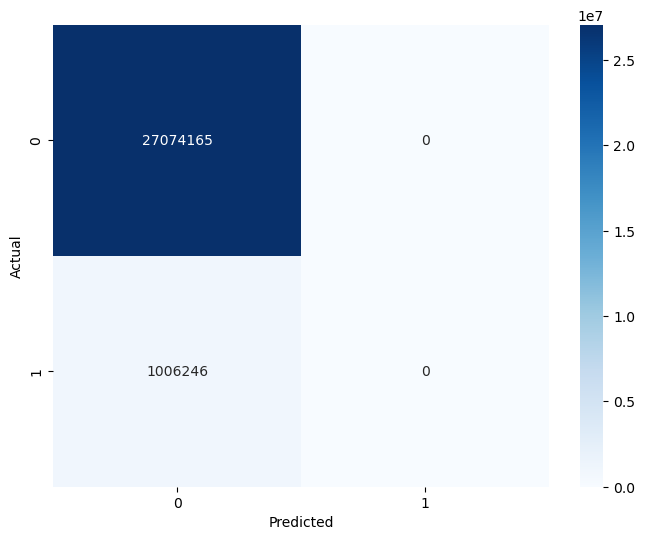

In [9]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature importances:
 land_use_plan    0.295876
treecover2000    0.704124
dtype: float64


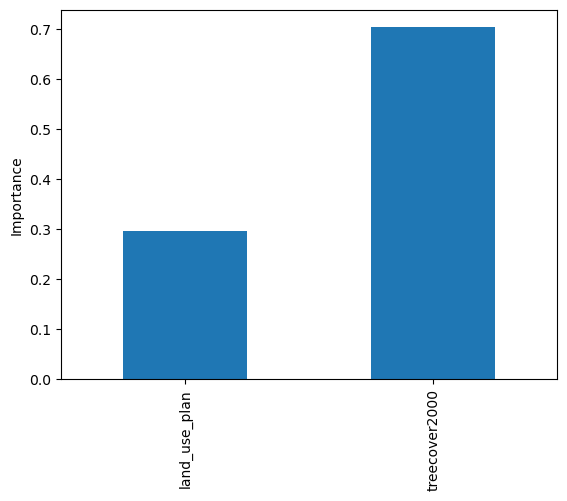

In [10]:
# 7. Assess the importance of the land use plan feature
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

feature_importances.plot(kind='bar')
plt.ylabel('Importance')
plt.show()